#PyAMPR Testing Notebook

<i>Author: Timothy Lang (timothy.j.lang@nasa.gov)</i>

This notebook does basic testing of PyAMPR capabilities, such as reading ASCII and netCDF files, plotting data, analysis etc.

To obtain AMPR data, go to http://ghrc.nsstc.nasa.gov/hydro/search.pl. The tests below make use of KWAJEX data, specifically the 8/25/1999 file.

The demo notebook in the notebooks directory also makes for a useful testing suite. This notebook complements that one by expanding testing to cover pre-polarization upgrade AMPR data as well as the new netCDF files available starting with IPHEx.

There are currently no automated unit tests for PyAMPR, due to its heavy focus on plotting.

###Import Test

The following cell should execute with no errors.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import pyampr
from IPython.display import Image
%matplotlib inline

###Help Test

The following cell should execute and display something akin to the following:

<pre>
Help on package pyampr:

NAME
    pyampr - pyampr v1.4.0 by Timothy J. Lang

FILE
    /Users/tjlang/anaconda/lib/python2.7/site-packages/pyampr/__init__.py

DESCRIPTION
    PyAMPR is a package to read, analyze, and display AMPR data
    
    Please e-mail bug reports to: timothy.j.lang@nasa.gov

PACKAGE CONTENTS
    google_earth_tools
    pyampr
    udf_cmap

DATA
    __author__ = 'Timothy J. Lang'
    __email__ = 'timothy.j.lang@nasa.gov'
    __version__ = '1.4.0'

VERSION
    1.4.0

AUTHOR
    Timothy J. Lang
</pre>

In [2]:
help(pyampr)

Help on package pyampr:

NAME
    pyampr - pyampr v1.4.0 by Timothy J. Lang

FILE
    /Users/tjlang/anaconda/lib/python2.7/site-packages/pyampr/__init__.py

DESCRIPTION
    PyAMPR is a package to read, analyze, and display AMPR data
    
    Please e-mail bug reports to: timothy.j.lang@nasa.gov

PACKAGE CONTENTS
    google_earth_tools
    pyampr
    udf_cmap

DATA
    __author__ = 'Timothy J. Lang'
    __email__ = 'timothy.j.lang@nasa.gov'
    __version__ = '1.4.0'

VERSION
    1.4.0

AUTHOR
    Timothy J. Lang




###Old Data Testing

Assuming you have the KWAJEX 8/25/1999 datafile in the right location, the following should execute with no errors and display something akin to the following:

<pre>
********************
read_ampr_tb_level2b(): Reading /Users/tjlang/Documents/AMPR/old_campaigns/kwajex_ampr_19990825_ghrc_ver2.txt
Not netCDF file, trying ASCII read ...
Assuming KWAJEX data structure.
Change to proper project if incorrect, otherwise errors will occur.
Currently available field projects: IPHEX, MC3E, TC4, TCSP, JAX90, COARE,
CAMEX1, CAMEX2, CAMEX3, CAMEX4, TRMMLBA, KWAJEX, TEFLUNA, FIRE3ACE, CAPE
Default: project = 'IPHEX'
Number of scans = 6557
Only A channels available in this project's data
********************
</pre>

In [19]:
# Change data pathway as needed
datafile = '/Users/tjlang/Documents/AMPR/old_campaigns/kwajex_ampr_19990825_ghrc_ver2.txt'
test_old = pyampr.AmprTb(datafile, project='kwajex')


********************
read_ampr_tb_level2b(): Reading /Users/tjlang/Documents/AMPR/old_campaigns/kwajex_ampr_19990825_ghrc_ver2.txt
Not netCDF file, trying ASCII read ...
Assuming KWAJEX data structure.
Change to proper project if incorrect, otherwise errors will occur.
Currently available field projects: IPHEX, MC3E, TC4, TCSP, JAX90, COARE,
CAMEX1, CAMEX2, CAMEX3, CAMEX4, TRMMLBA, KWAJEX, TEFLUNA, FIRE3ACE, CAPE
Default: project = 'IPHEX'
Number of scans = 6557
Only A channels available in this project's data
********************



#####Old Data Track Plot

The cell after next should execute with no errors, and provide the following text and image output

<pre>
********************
plot_ampr_track():
Warning: Older projects commonly had bad or missing geolocation data.
If there are plotting problems, try a strip chart with plot_ampr_channels(),
or try adjusting scanrange, lonrange, or latrange.
Available scans = 1 to 6557
Available times = 03:57:38 - 06:41:21
50 bad geolocation(s) (0s/-1s) exist, attempting correction.
If aircraft crossed Equator or Prime Meridian,try keyword equator=True.
********************
</pre>

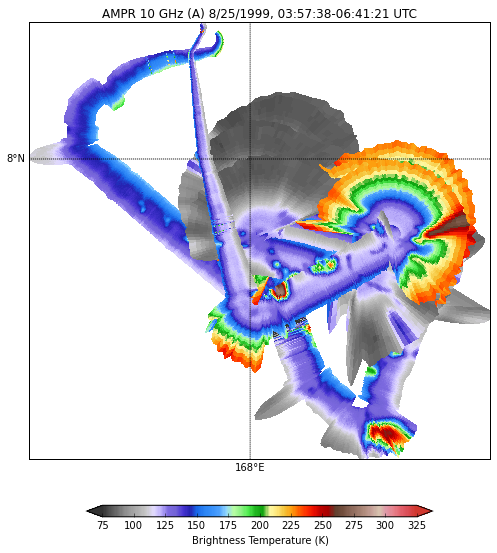

In [4]:
# Comparison image for testing
Image(filename = 'test_kwajex_track.png')


********************
plot_ampr_track():
If there are plotting problems, try a strip chart with plot_ampr_channels(),
or try adjusting scanrange, lonrange, or latrange.
Available scans = 1 to 6557
Available times = 03:57:38 - 06:41:21
50 bad geolocation(s) (0s/-1s) exist, attempting correction.
If aircraft crossed Equator or Prime Meridian,try keyword equator=True.
********************



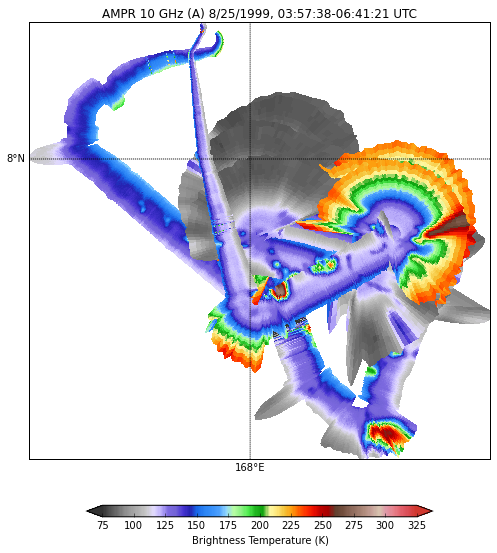

In [5]:
# Test cell here
test_old.plot_ampr_track()

#####Old Data Strip Chart

The cell after next should execute with no errors, and provide the following text and image output


<pre>
********************
plot_ampr_channels():
Available scans = 1 to 6557
Available times = 03:57:38 - 06:41:21
********************
</pre>

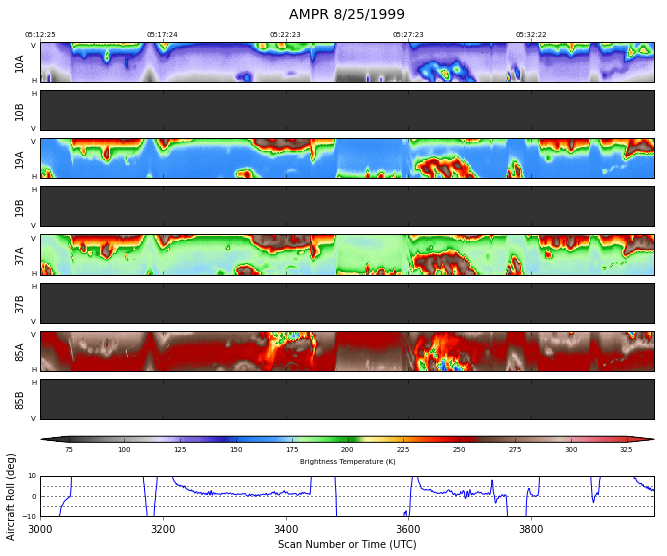

In [6]:
# Comparison image for testing
Image(filename = 'test_kwajex_strip.png')


********************
plot_ampr_channels():
Available scans = 1 to 6557
Available times = 03:57:38 - 06:41:21
********************



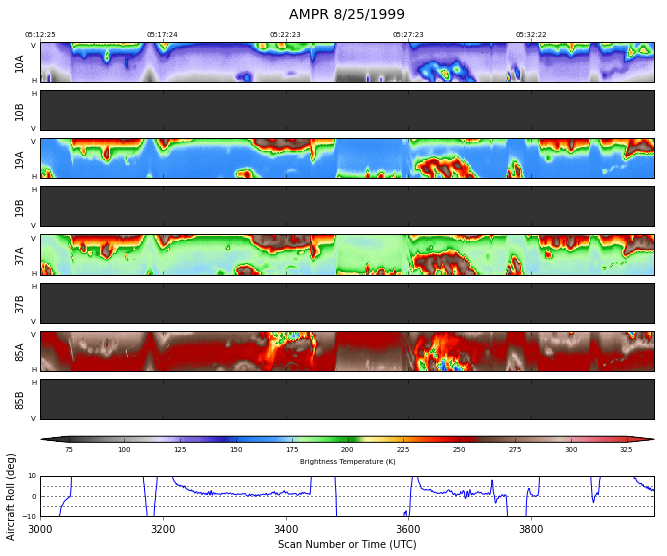

In [14]:
# Test cell here
# May take a while to execute
test_old.plot_ampr_channels(scanrange=[3000,4000])

###New netCDF Data Testing

First define where the V2 IPHEx data may be found. These data are not yet publicly available. Contact timothy.j.lang@nasa.gov if you wish to obtain a sample for testing purposes.

In [7]:
datadir = '/Users/tjlang/Documents/AMPR/IPHEX/AMPR_IPHEx_V2/'
files = sorted(glob.glob(datadir+'*.nc'))
print [os.path.basename(fi) for fi in files]

['IPHEX_AMPR_20140606_level2b_v2.nc']


The following cell should execute and produce something akin to this text:

<pre>
********************
read_ampr_tb_level2b(): Reading /Users/tjlang/Documents/AMPR/IPHEX/AMPR_IPHEx_V2/IPHEX_AMPR_20140606_level2b_v2.nc
Assuming IPHEX data structure.
Change to proper project if incorrect, otherwise errors will occur.
Currently available field projects: IPHEX, MC3E, TC4, TCSP, JAX90, COARE,
CAMEX1, CAMEX2, CAMEX3, CAMEX4, TRMMLBA, KWAJEX, TEFLUNA, FIRE3ACE, CAPE
Default: project = 'IPHEX'
Found Navigation Data!
(4108,)
********************
</pre>

In [8]:
test_nc = pyampr.AmprTb(datadir+'IPHEX_AMPR_20140606_level2b_v2.nc', project='IPHEx')


********************
read_ampr_tb_level2b(): Reading /Users/tjlang/Documents/AMPR/IPHEX/AMPR_IPHEx_V2/IPHEX_AMPR_20140606_level2b_v2.nc
Assuming IPHEX data structure.
Change to proper project if incorrect, otherwise errors will occur.
Currently available field projects: IPHEX, MC3E, TC4, TCSP, JAX90, COARE,
CAMEX1, CAMEX2, CAMEX3, CAMEX4, TRMMLBA, KWAJEX, TEFLUNA, FIRE3ACE, CAPE
Default: project = 'IPHEX'
Found Navigation Data!
(4108,)
********************



#####Test netCDF Track Plot

The cell after next should produce the following text and image. 

<pre>
********************
plot_ampr_track():
Available scans = 1 to 4108
Available times = 13:05:38 - 20:38:34
Warning: Your aspect ratio choice could lead to poor plotting results.
Best results are obtained when latrange ~ lonrange.
********************
</pre>

Note - You may get a matplotlib warning:
<pre>
RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)
</pre>

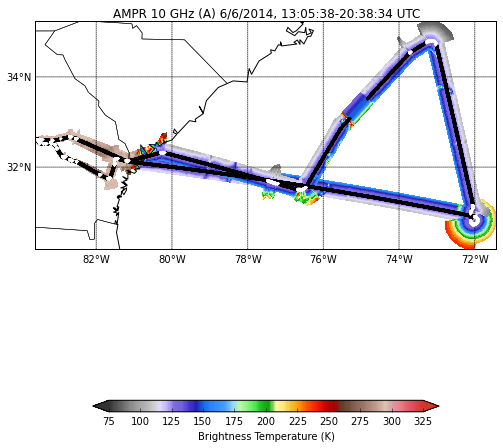

In [9]:
# Comparison image for testing
Image(filename = 'test_iphex_track.png')


********************
plot_ampr_track():
Available scans = 1 to 4108
Available times = 13:05:38 - 20:38:34
Best results are obtained when latrange ~ lonrange.
********************



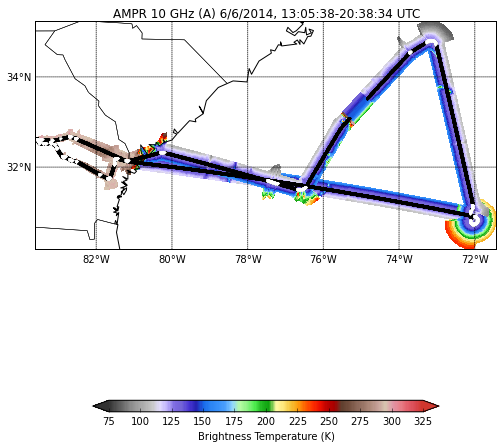

In [21]:
# Test cell here
test_nc.plot_ampr_track(show_track=True)

#####Test keword arguments in plot_ampr_track()

The cell after next should produce the following text and image. 

<pre>
********************
plot_ampr_track():
Available scans = 1 to 4108
Available times = 13:05:38 - 20:38:34
********************
</pre>

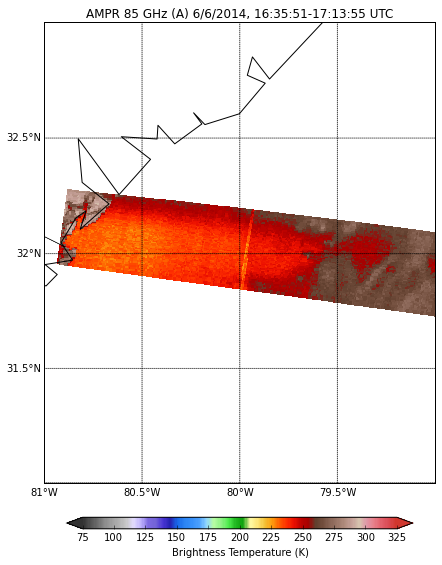

In [10]:
# Comparison image for testing
Image(filename = 'test_iphex_track_zoom.png')


********************
plot_ampr_track():
Available scans = 1 to 4108
Available times = 13:05:38 - 20:38:34
********************



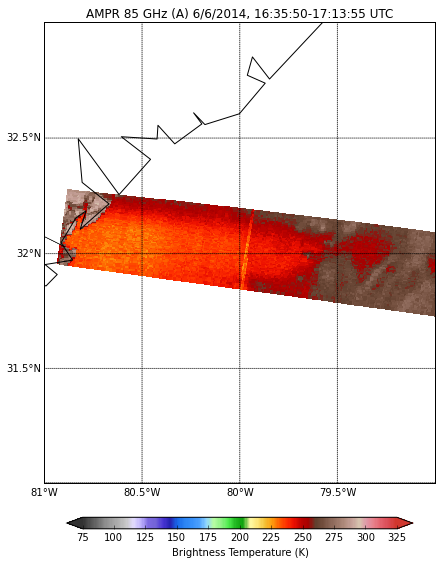

In [23]:
# Test cell here
test_nc.plot_ampr_track('85A', latrange=[31,33], lonrange=[-81,-79],
                        scanrange=[1000,1500], parallels=0.5, meridians=0.5)

#####Test netCDF strip chart and polarization deconvolution

The cell after next should produce the following text and image. 

<pre>
********************
plot_ampr_channels():
Missing some pol channels, trying calc_polarization() before plot

********************
calc_polarization():
Calculating for 10 GHz channel
Calculating for 19 GHz channel
Calculating for 37 GHz channel
Calculating for 85 GHz channel
0.257108211517 seconds to calculate H & V
If successful, following attributes are now available:
TB10H TB10V TB19H TB19V TB37H TB37V TB85H TB85V
********************

Available scans = 1 to 4108
Available times = 13:05:38 - 20:38:34
********************
</pre>

Note - You may get a matplotlib warning:
<pre>
RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)
</pre>

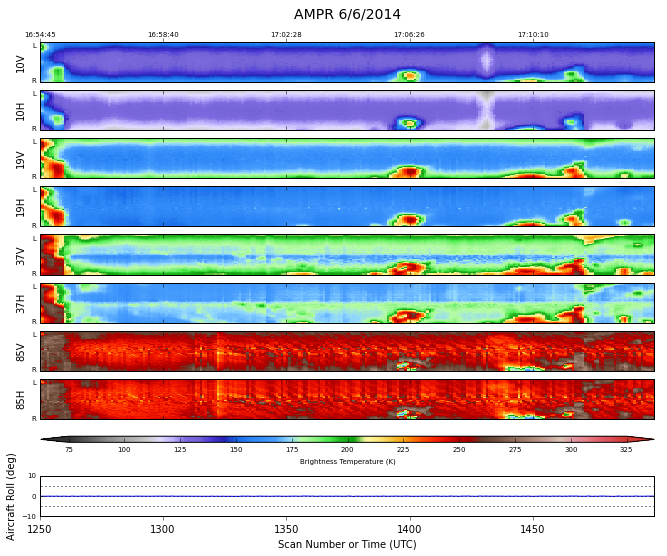

In [11]:
# Comparison image for test
Image(filename = 'test_iphex_strip.png')


********************
plot_ampr_channels():
Missing some pol channels, trying calc_polarization() before plot

********************
calc_polarization():
Calculating for 10 GHz channel
Calculating for 19 GHz channel
Calculating for 37 GHz channel
Calculating for 85 GHz channel
0.257108211517 seconds to calculate H & V
If successful, following attributes are now available:
TB10H TB10V TB19H TB19V TB37H TB37V TB85H TB85V
********************

Available scans = 1 to 4108
Available times = 13:05:38 - 20:38:34
********************



/Users/tjlang/anaconda/lib/python2.7/site-packages/matplotlib/colors.py:583: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


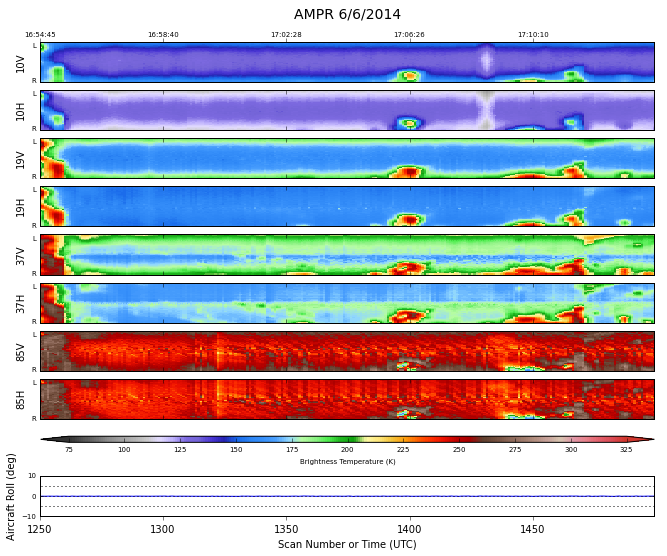

In [24]:
# Test cell here
test_nc.plot_ampr_channels(scanrange=[1250,1500], show_pol=True)

#####Test timerange keyword

The cell after next should display the following text and image. If you have not yet deconvolved polarizations by running the previous test, then you should get additional information on the deconvolution process, similar to the text in that test.

<pre>
********************
plot_ampr_channels():
Available scans = 1 to 4108
Available times = 13:05:38 - 20:38:34
********************
</pre>

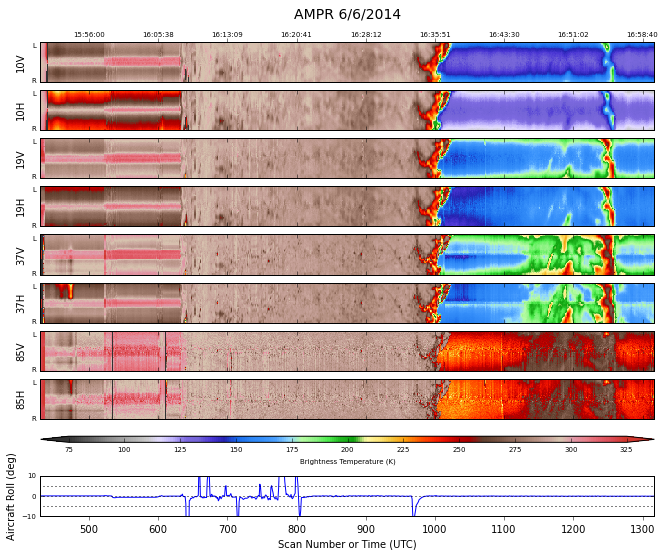

In [12]:
# Comparison image for test
Image(filename = 'test_iphex_strip_zoom.png')


********************
plot_ampr_channels():
Available scans = 1 to 4108
Available times = 13:05:38 - 20:38:34
********************



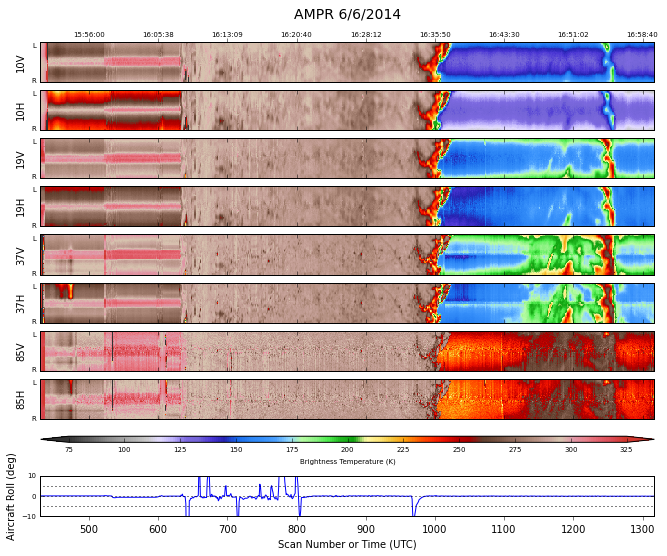

In [28]:
# Test cell here
test_nc.plot_ampr_channels(timerange=['15:00:00', '17:00:00'], show_pol=True)

#####Test polarization deconvolved track plot

The cell after next should produce the following text and image.

<pre>
********************
plot_ampr_track():
Available scans = 1 to 4108
Available times = 13:05:38 - 20:38:34
********************
</pre>

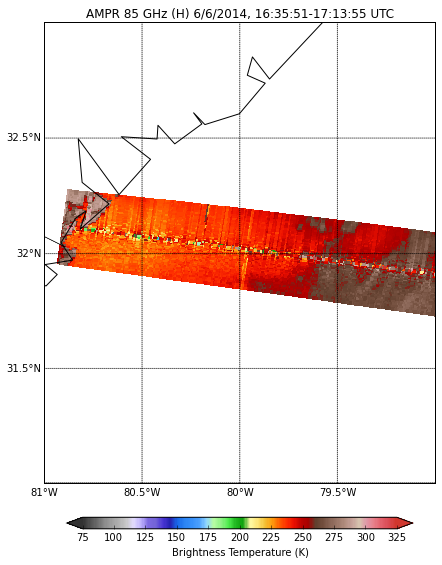

In [13]:
# Comparison image for test
Image(filename = 'test_iphex_pol.png')


********************
plot_ampr_track():
Available scans = 1 to 4108
Available times = 13:05:38 - 20:38:34
********************



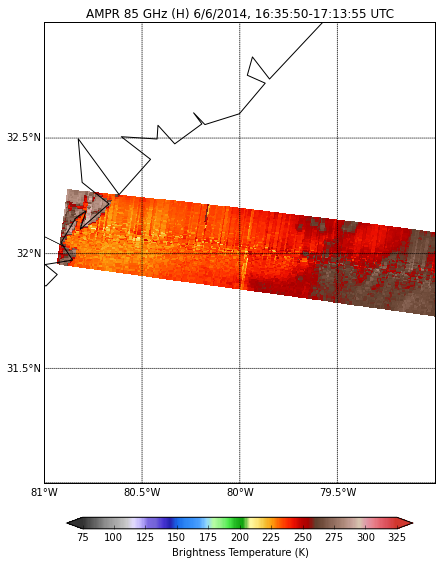

In [31]:
#Test cell here
test_nc.plot_ampr_track('85H', latrange=[31,33], lonrange=[-81,-79],
                        scanrange=[1000,1500], parallels=0.5, meridians=0.5)

#####Test KMZ output

After the following two cells, there is a cell that will test KMZ output for Google Earth display. You should see the following text and images.

<pre>
********************
write_ampr_kmz():
Available scans = 1 to 4108
Available times = 13:05:38 - 20:38:34
Google Earth image hopefully written to: 20140606_130538z_TB10A.kmz
********************
</pre>

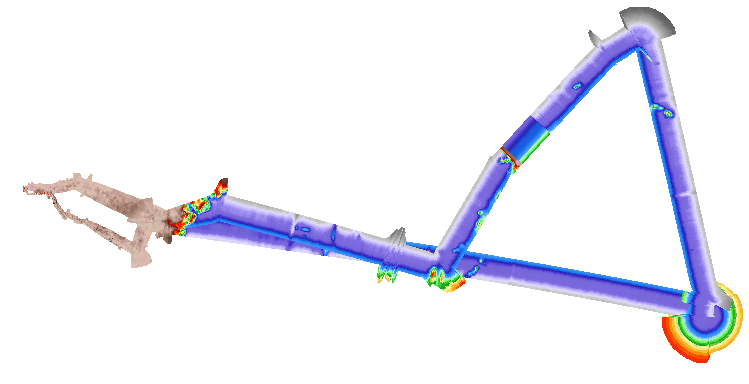

In [14]:
# Comparison track image for test
Image(filename = 'test_iphex_kmz_track.png')

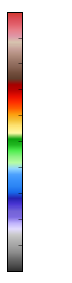

In [15]:
# Comparison colorbar image for test
Image(filename = 'test_iphex_kmz_colorbar.png')


********************
write_ampr_kmz():
Available scans = 1 to 4108
Available times = 13:05:38 - 20:38:34
Google Earth image hopefully written to: 20140606_130538z_TB10A.kmz
********************



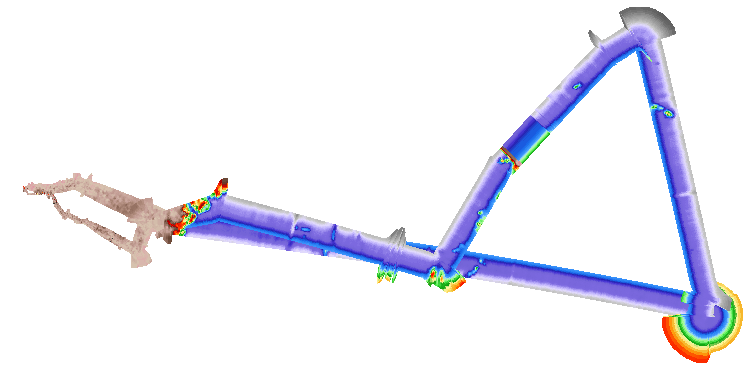

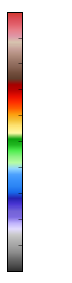

In [16]:
test_nc.write_ampr_kmz()

You may check the newly created KMZ file in Google Earth. You should see something like the following when you zoom to this field of view.

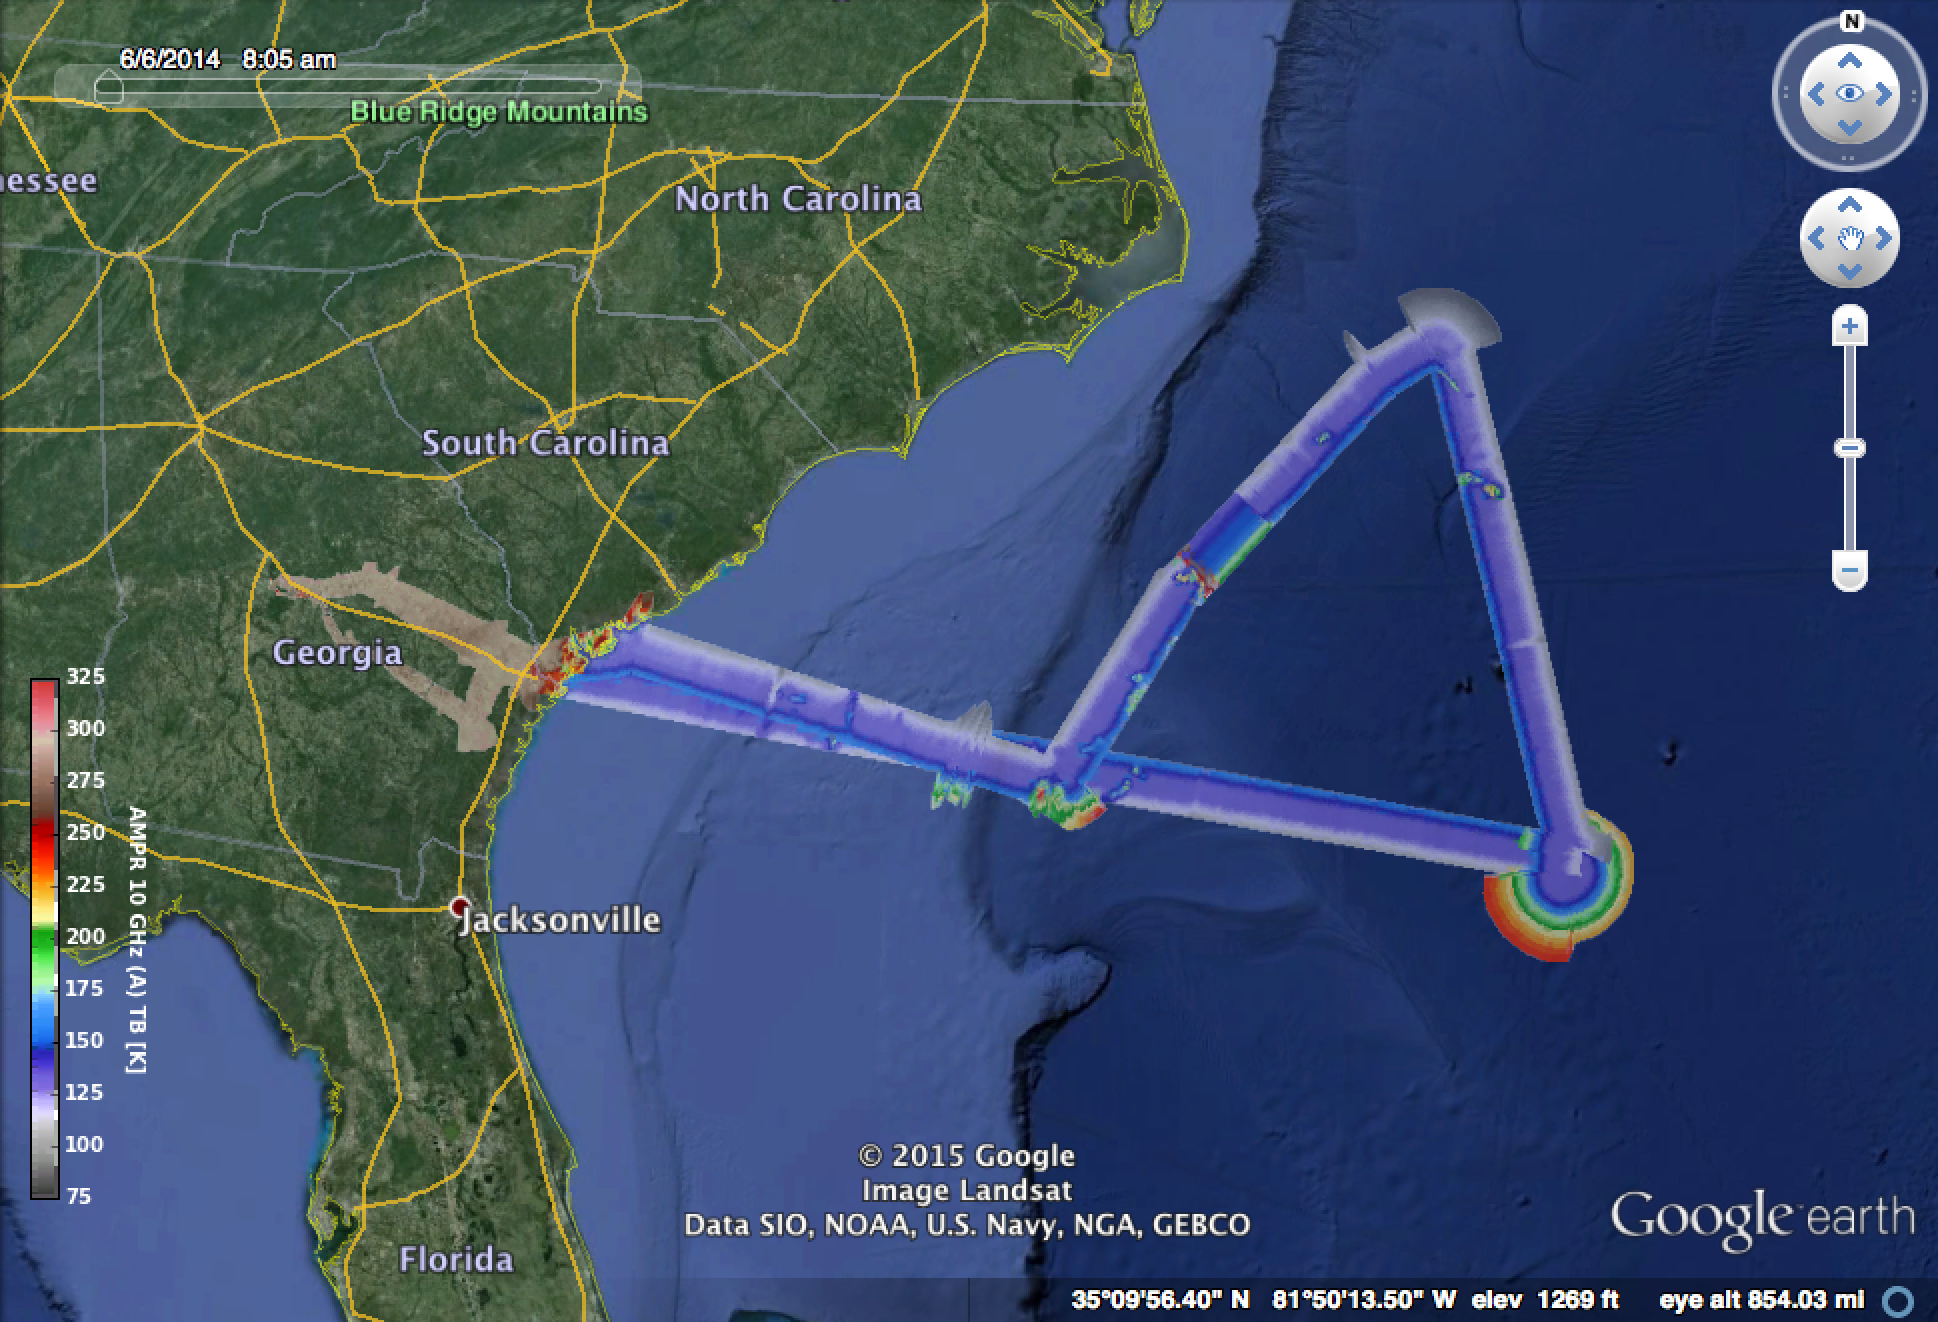

In [17]:
Image(filename = 'test_google_earth.png')

###Testing Navigation Variables

The following should print this text:

<pre>
['GPS Latitude', 'GPS Longitude', 'GPS Altitude', 'Pitch', 'Roll', 'Yaw', 'Heading', 'Ground Speed', 'Air Speed', 'Static Pressure', 'Total Pressure', 'Total Temperature', 'Static Temperature', 'Wind Speed', 'Wind Direction', 'INS Latitude', 'INS Longitude', 'INS Altitude']
</pre>

In [39]:
print test_nc.Aircraft_varlist 

['GPS Latitude', 'GPS Longitude', 'GPS Altitude', 'Pitch', 'Roll', 'Yaw', 'Heading', 'Ground Speed', 'Air Speed', 'Static Pressure', 'Total Pressure', 'Total Temperature', 'Static Temperature', 'Wind Speed', 'Wind Direction', 'INS Latitude', 'INS Longitude', 'INS Altitude']


<hr>
The following should print this text:

<pre>
min, mean, median, max: -55.0609999895 -17.6216748447 -37.1475999832 38.1654999971
min, mean, median, max: -999.0 -999.0 -999.0 -999.0
</pre>

In [42]:
def print_stats(array):
    bad = np.isnan(array)
    print 'min, mean, median, max:', np.min(array[~bad]), np.mean(array[~bad]),\
          np.median(array[~bad]), np.max(array[~bad])
    
print_stats(test_nc.Aircraft_Nav['Total Temperature'])
print_stats(test_nc.Aircraft_Nav['Static Temperature'])

min, mean, median, max: -55.0609999895 -17.6216748447 -37.1475999832 38.1654999971
min, mean, median, max: -999.0 -999.0 -999.0 -999.0


###Miscellaneous Tests

The following should print this text:

<pre>
[-44.1 -42.3 -40.5 -38.7 -36.9 -35.1 -33.3 -31.5 -29.7 -27.9 -26.1 -24.3
 -22.5 -20.7 -18.9 -17.1 -15.3 -13.5 -11.7  -9.9  -8.1  -6.3  -4.5  -2.7
  -0.9   0.9   2.7   4.5   6.3   8.1   9.9  11.7  13.5  15.3  17.1  18.9
  20.7  22.5  24.3  26.1  27.9  29.7  31.5  33.3  35.1  36.9  38.7  40.5
  42.3  44.1]
</pre>

In [43]:
print test_nc.swath_angle

[-44.1 -42.3 -40.5 -38.7 -36.9 -35.1 -33.3 -31.5 -29.7 -27.9 -26.1 -24.3
 -22.5 -20.7 -18.9 -17.1 -15.3 -13.5 -11.7  -9.9  -8.1  -6.3  -4.5  -2.7
  -0.9   0.9   2.7   4.5   6.3   8.1   9.9  11.7  13.5  15.3  17.1  18.9
  20.7  22.5  24.3  26.1  27.9  29.7  31.5  33.3  35.1  36.9  38.7  40.5
  42.3  44.1]


In [18]:
# Add more tests here!